In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

GOLDEN_RATIO = 1.61803
DEFAULT_FIGSIZE = 6.2262

save = False

def get_figsize(width=1 / 2, ratio=GOLDEN_RATIO, base_figsize=DEFAULT_FIGSIZE):
    """ Get the figure size for a Latex document in inches
    Args:
        width (float): width in terms of textwidth in a Latex doc that the figure should occupy
        base_figsize (float): width of the page
        ratio (float): height = width / ratio
    Returns:
        (width, height) tuple of floats
    """
    return base_figsize * width, base_figsize * width / ratio

pos = np.loadtxt("data/virtual-agents/old/positions.txt", delimiter=",")
ori = np.loadtxt("data/virtual-agents/old/orientations.txt", delimiter=",")

In [29]:
norm = mpl.colors.Normalize(vmin=-20, vmax=20)
cm = mpl.cm.viridis
sm = mpl.cm.ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])

## Visualize positions and viewing directions

In [3]:
n = ori.shape[0] # only look a the first n time steps
x, y, z = pos[:n].T

# euler angles contain elevation angle and heading angle, last angle (roll) is always zero for me
elevation_human, heading_human, _ = ori[:n].T
# convert to radians
elevation_human, heading_human = np.deg2rad(elevation_human), np.deg2rad(heading_human)

In [4]:
# compute viewing direction
dx_human = np.cos(elevation_human) * np.sin(heading_human)
dy_human = -np.sin(elevation_human)
dz_human = np.cos(elevation_human) * np.cos(heading_human)

Text(0.5, 1.0, 'Human')

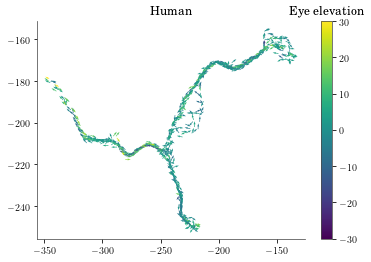

In [5]:
plt.quiver(x, z, dx_human, dz_human, color=cm(norm(np.rad2deg(np.arcsin(dy_human)))))
clb = plt.colorbar(sm)
clb.ax.set_title("Eye elevation")
plt.title("Human")

## Agent 1: always looking straight ahead in walking direction

In [6]:
elevation_straight, heading_straight = np.zeros_like(x)[:-1], np.arctan2(np.diff(x), np.diff(z))

if save:
    np.savetxt("data/virtual-agents/straight/orientations.txt",np.stack([np.rad2deg(elevation_straight), np.rad2deg(heading_straight), np.zeros_like(elevation_straight)]).T, delimiter=",")
    np.savetxt("data/virtual-agents/straight/positions.txt", pos[:-1], delimiter=",")
# compute viewing direction
dx_straight = np.cos(elevation_straight) * np.sin(heading_straight)
dy_straight = -np.sin(elevation_straight)
dz_straight = np.cos(elevation_straight) * np.cos(heading_straight)

Text(0.5, 1.0, 'Looking straight ahead')

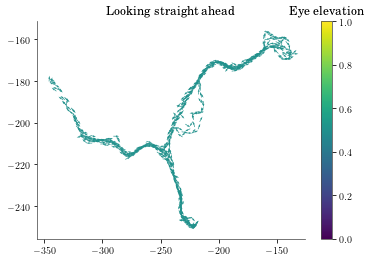

In [7]:
q = plt.quiver(x[:-1], z[:-1], dx_straight, dz_straight, color=cm(norm(np.rad2deg(np.arcsin(dy_straight)))))
clb = plt.colorbar()
clb.ax.set_title("Eye elevation")
plt.title("Looking straight ahead")

## Agent 2: always looking towards the ground in walking direction


In [8]:
elevation_down, heading_down = np.deg2rad(np.ones_like(x[:-1]) * 30), np.arctan2(np.diff(x), np.diff(z))
if save:
    np.savetxt("data/virtual-agents/down/orientations.txt",np.stack([np.rad2deg(elevation_down), np.rad2deg(heading_down), np.zeros_like(elevation_down)]).T, delimiter=",")
    np.savetxt("data/virtual-agents/down/positions.txt", pos[:-1], delimiter=",")

# compute viewing direction
dx_down = np.cos(elevation_down) * np.sin(heading_down)
dy_down = -np.sin(elevation_down)
dz_down = np.cos(elevation_down) * np.cos(heading_down)

Text(0.5, 1.0, 'Looking at the ground')

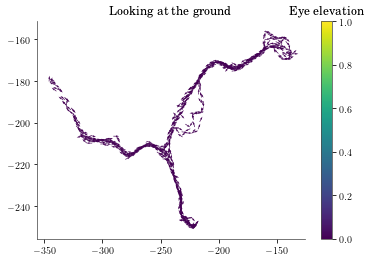

In [9]:
q = plt.quiver(x[:-1], z[:-1], dx_down, dz_down, color=cm(norm(np.rad2deg(np.arcsin(dy_down)))))
clb = plt.colorbar()
clb.ax.set_title("Eye elevation")
plt.title("Looking at the ground")


## Agent 3: random direction around viewing direction

In [10]:
elevation_random, heading_random = np.deg2rad(np.ones_like(x)[:-1]), np.arctan2(np.diff(x), np.diff(z))
elevation_random = elevation_random + np.random.randn(*elevation_random.shape)
heading_random = heading_random + np.random.randn(*heading_random.shape)

if save:
    np.savetxt("data/virtual-agents/random/orientations.txt",np.stack([np.rad2deg(elevation_random), np.rad2deg(heading_random), np.zeros_like(elevation_random)]).T, delimiter=",")
    np.savetxt("data/virtual-agents/random/positions.txt", pos[:-1], delimiter=",")


# compute viewing direction
dx_random = np.cos(elevation_random) * np.sin(heading_random)
dy_random = -np.sin(elevation_random)
dz_random = np.cos(elevation_random) * np.cos(heading_random)

Text(0.5, 1.0, 'Random')

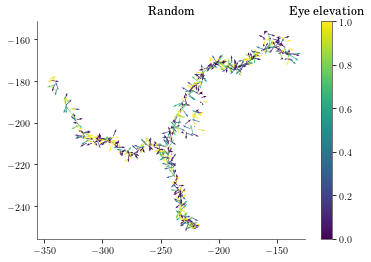

In [11]:
q = plt.quiver(x[:-1], z[:-1], dx_random, dz_random, color=cm(norm(np.rad2deg(np.arcsin(dy_random)))))
clb = plt.colorbar()
clb.ax.set_title("Eye elevation")
plt.title("Random")

## All together now

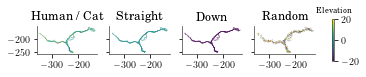

In [34]:
f, ax = plt.subplots(1, 4, figsize=get_figsize(1.), sharey=True, sharex=True)
ax[0].quiver(x, z, dx_human, dz_human, color=cm(norm(np.rad2deg(np.arcsin(dy_human)))))
ax[0].set_title("Human / Cat")
ax[0].set_aspect("equal")

ax[1].quiver(x[:-1], z[:-1], dx_straight, dz_straight, color=cm(norm(np.rad2deg(np.arcsin(dy_straight)))))
ax[1].set_title("Straight")
ax[1].set_aspect("equal")

ax[2].quiver(x[:-1], z[:-1], dx_down, dz_down, color=cm(norm(np.rad2deg(np.arcsin(dy_down)))))
ax[2].set_title("Down")
ax[2].set_aspect("equal")

ax[3].quiver(x[:-1], z[:-1], dx_random, dz_random, color=cm(norm(np.rad2deg(np.arcsin(dy_random)))))
ax[3].set_title("Random")
ax[3].set_aspect("equal")


clb = f.colorbar(sm, ax=ax, shrink=0.2)
clb.ax.set_title("Elevation", fontsize=8)

# f.savefig("virtual-agents.eps")
# f.savefig("virtual-agents.pdf")
# f.savefig("virtual-agents.svg")